In [255]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

from unsupervised.svd import SingularValueDecomposition
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [289]:
X = load_iris()['data']
y = load_iris()['target']
X = StandardScaler().fit_transform(X)

### SVD

In [144]:
simple_test = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [177]:
sklearn_svd = TruncatedSVD(n_components=7)
sklearn_svd.fit(simple_test)

TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5,
       random_state=None, tol=0.0)

In [178]:
# sklearn MSE
np.sum((sklearn_svd.transform(simple_test) @ sklearn_svd.components_ - simple_test)**2)

20.96778386218907

In [245]:
from unsupervised.svd import SingularValueDecomposition
svd = SingularValueDecomposition(latent_space_size=7, n_iter=500, verbose=False)
u, v = svd.decompose(simple_test)

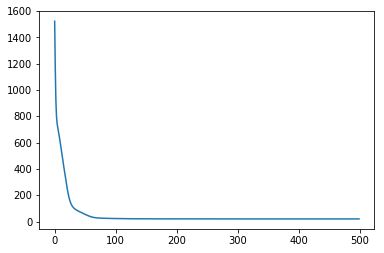

In [246]:
plt.plot(svd._loss_history);

In [247]:
# MSE
np.sum((u @ v - simple_test)**2)

21.034650953284142

#### testing on iris dataset

In [258]:
sklearn_svd = TruncatedSVD(n_components=2)
sklearn_svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [259]:
# sklearn MSE
np.sum((sklearn_svd.transform(X) @ sklearn_svd.components_ - X)**2)

25.194147831108157

In [274]:
svd = SingularValueDecomposition(latent_space_size=2, n_iter=700, verbose=False)
u, v = svd.decompose(X)

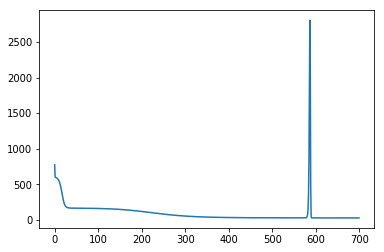

In [275]:
plt.plot(svd._loss_history);

In [276]:
# MSE
np.sum((u @ v - X)**2)

25.225403671614075

### PCA

In [277]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

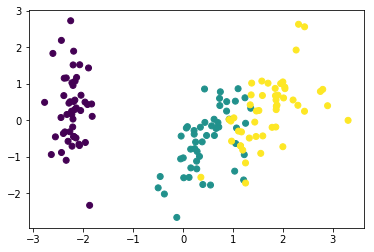

In [292]:
plt.scatter(pca.transform(X)[:,0], pca.transform(X)[:,1], c=y);

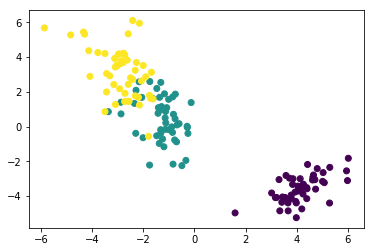

In [291]:
plt.scatter((X @ v.T)[:, 0], (X @ v.T)[:, 1], c=y);